Question 3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

question 4 Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [4]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [5]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [6]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


question 5 How many rows and columns are in `gdp_df`? What are the data types of each column

In [8]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


question 6  Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'

In [10]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [11]:
gdp_df = gdp_df.rename(columns ={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP Per Capita'})

Question 7  How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [13]:
country_year_counts = gdp_df.groupby('Country')['Year'].nunique()
total_years = gdp_df['Year'].nunique()
countries_all_years = country_year_counts[ country_year_counts == total_years].index.tolist()
number_of_countries_all_years = len(countries_all_years)
print(number_of_countries_all_years)

202


In [14]:
countries_without_years = country_year_counts[ country_year_counts >= (total_years-3)].index.tolist()
print(countries_without_years)

['Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean small states', 'Central African Republic', 'Central Europe and the Baltics', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Cyprus', 'Czechia', "CÃ´te d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Dominica', 'Dominican Republic', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD)', 'East Asia & Pacific (excluding high income)', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'Euro area', 'Europe & Central Asia', 'Europe & Central Asia (IDA & IBRD)', 'Europe & Cent

In [15]:
len(countries_without_years)

211

Question 8 In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020.

In [22]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP Per Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


In [25]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

In [27]:
gdp_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 1 to 7631
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         242 non-null    object 
 1   Year            242 non-null    int64  
 2   GDP Per Capita  242 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.6+ KB


In [39]:
x

1       2020
22      2020
55      2020
88      2020
121     2020
        ... 
7503    2020
7536    2020
7565    2020
7598    2020
7631    2020
Name: Year, Length: 242, dtype: int64

In [41]:
y

1        1968.341002
22       3455.023119
55       3957.933804
88      13278.369769
121     10844.770764
            ...     
7503    10450.622382
7536     5402.538773
7565    16204.169107
7598     3183.650773
7631     1990.319419
Name: GDP Per Capita, Length: 242, dtype: float64

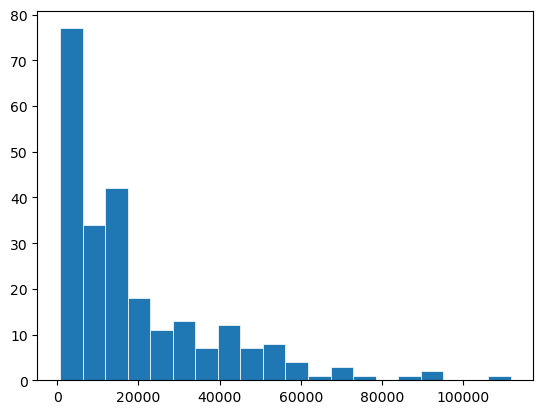

In [49]:
fig, ax = plt.subplots()
x= gdp_2020['GDP Per Capita']
ax.hist(x, bins=20, linewidth=0.5, edgecolor="white")

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 56), yticks=np.linspace(0, 56, 9))

plt.show()

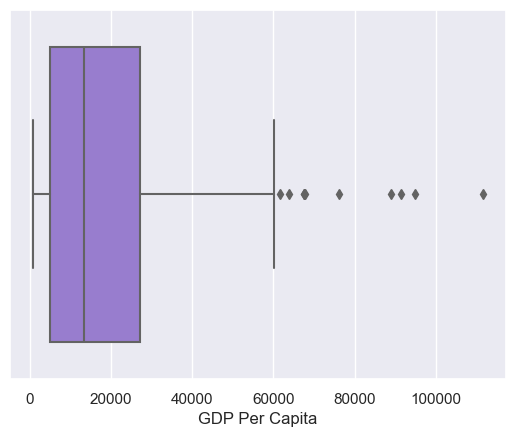

In [69]:
sns.set_theme(style="darkgrid")

sns.boxplot(x=gdp_2020['GDP Per Capita'], color='mediumpurple')

plt.show()

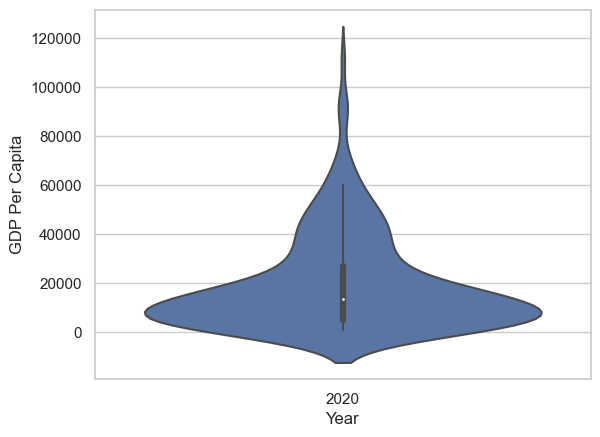

In [87]:

sns.set(style = 'whitegrid') 
# gdp_2020 = sns.load_dataset("gdp_2020") 

sns.violinplot(y ="GDP Per Capita", 
             x ="Year", 
             data = gdp_2020) 
plt.show()

9. What was the median GDP per capita value in 2020?

In [81]:
gdp_2020['GDP Per Capita'].median()

13357.997573370474

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplon)
	* A scatterplot
	* A scatterplot

In [107]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP Per Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


In [109]:
gdp_4_decades = gdp_df[gdp_df["Year"].isin([1990,2000,2010,2020])]
gdp_4_decades.info()

<class 'pandas.core.frame.DataFrame'>
Index: 921 entries, 1 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         921 non-null    object 
 1   Year            921 non-null    int64  
 2   GDP Per Capita  921 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 28.8+ KB


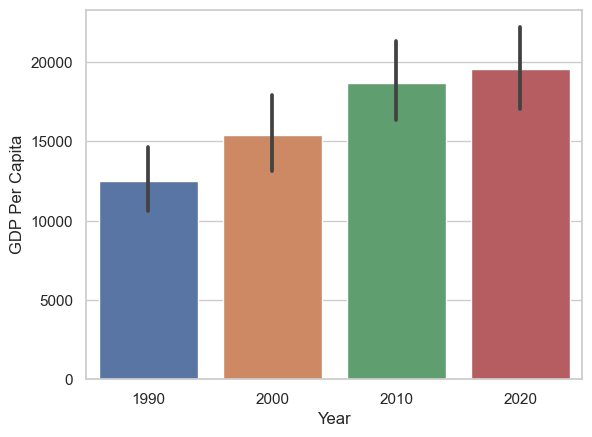

In [113]:
# df = sns.load_dataset('titanic')
 
# class v / s fare barplot 
sns.barplot(x = 'Year', y = 'GDP Per Capita', data = gdp_4_decades)
 
# Show the plot
plt.show()

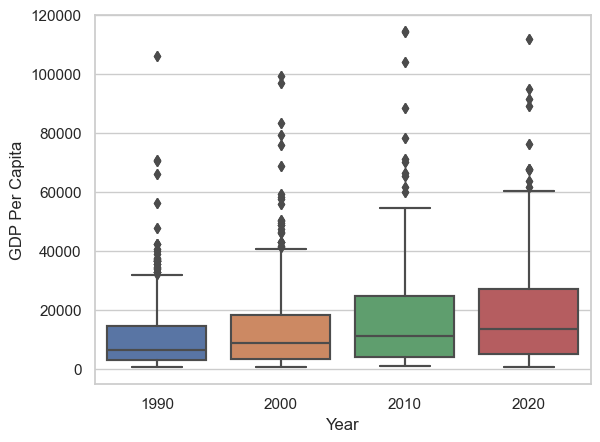

In [117]:
sns.set(style='whitegrid')
# fmri = seaborn.load_dataset("fmri")
 
sns.boxplot(x="Year",
                y="GDP Per Capita",
                data=gdp_4_decades)
plt.show()

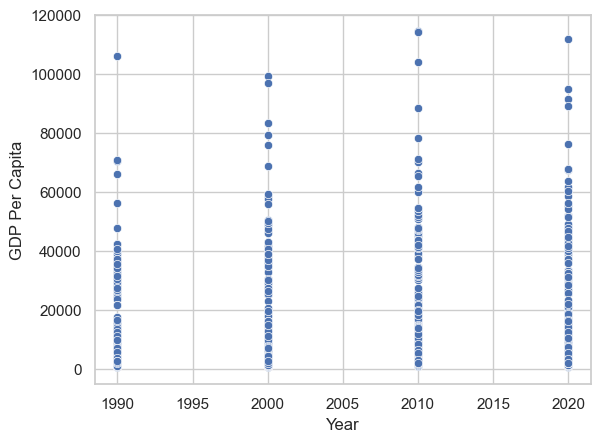

In [119]:
sns.set(style='whitegrid')
# fmri = seaborn.load_dataset("fmri")
 
sns.scatterplot(x="Year",
                    y="GDP Per Capita",
                    data=gdp_4_decades)
plt.show()

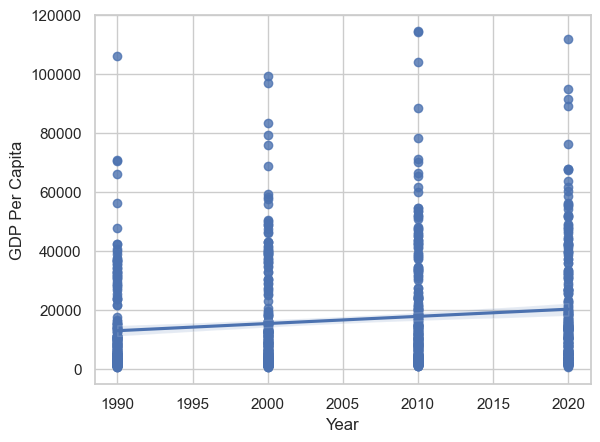

In [121]:
sns.regplot(x=gdp_4_decades["Year"], y=gdp_4_decades["GDP Per Capita"])
plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?


In [133]:
gdp_country_over100K = gdp_df[gdp_df['GDP Per Capita'] > 100000]
gdp_country_over100K.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 3277 to 7302
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         45 non-null     object 
 1   Year            45 non-null     int64  
 2   GDP Per Capita  45 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4+ KB


In [135]:
gdp_country_over100K

,Country,Year,GDP Per Capita
3277,Ireland,2022,113870.785550
3278,Ireland,2021,102785.490239
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563


In [139]:
gdp_country_over100K.sort_values(by=['GDP Per Capita'])

,Country,Year,GDP Per Capita
7295,United Arab Emirates,1997,100956.706467
7301,United Arab Emirates,1991,101048.696239
4167,Luxembourg,2001,101143.147977
5751,Qatar,2015,101971.989608
3278,Ireland,2021,102785.490239
4166,Luxembourg,2002,103317.331098
5756,Qatar,2010,103902.519310
4165,Luxembourg,2003,104743.000088
7302,United Arab Emirates,1990,105893.626059
5752,Qatar,2014,106141.326189


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [143]:
high_2020 = gdp_df[gdp_df['Year'] == 2020]
high_2020.info

<bound method DataFrame.info of                           Country  Year  GDP Per Capita
1                     Afghanistan  2020     1968.341002
22    Africa Eastern and Southern  2020     3455.023119
55     Africa Western and Central  2020     3957.933804
88                        Albania  2020    13278.369769
121                       Algeria  2020    10844.770764
...                           ...   ...             ...
7503                     Viet Nam  2020    10450.622382
7536           West Bank and Gaza  2020     5402.538773
7565                        World  2020    16204.169107
7598                       Zambia  2020     3183.650773
7631                     Zimbabwe  2020     1990.319419

[242 rows x 3 columns]>

In [145]:
high_2020.sort_values(by=['GDP Per Capita'])

,Country,Year,GDP Per Capita
973,Burundi,2020,711.355263
1217,Central African Republic,2020,847.765012
1630,Dem. Rep. Congo,2020,1044.071214
6273,Somalia,2020,1127.418534
5074,Niger,2020,1214.546556
...,...,...,...
681,Bermuda,2020,76117.804744
5746,Qatar,2020,89019.069857
3279,Ireland,2020,91356.855054
6108,Singapore,2020,94910.101431
